<div style="text-align: center">
<b><font size=6>ChEn 3603 Homework 9 Problem 2
    </font></b>
</div>

<div class="alert alert-block alert-danger">

&copy; 2020 This material is copyright protected. Distributing this material in any form without written permission from Professor Sutherland is prohibited and may result in academic discipline.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1 - Minimum $\frac{L^\prime}{V^\prime}$

The minimum $\frac{L^\prime}{V^\prime}$ is obtained when the operating line intersects the equilibrium curve at the bottom of the column.

In [3]:
alpha = 0.784

# feed gas:
ynp1 = 0.1
YNP1 = ynp1/(1-ynp1)

# feed liquid:
X0 = 0.04  # mole CO2 / mol amine

# operating line slope (V'/L')
slope = 1.852

# exit vapor:
Y1 = (1-alpha)*YNP1


# equilibrium data
Y = np.array([ 0.003, 0.008, 0.015, 0.023, 0.032, 0.043, 0.055, 0.068, 0.083, 0.099, 0.12 ])
X = np.array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,  0.10,  0.11 ])


# Minumum number of stages:
KN = YNP1 / np.interp(YNP1,Y,X)
minSlope = ( YNP1 - Y1 ) / ( YNP1 / (YNP1 * ( KN - 1 ) + KN ) - X0 )

print('The minumum ratio of L\'/V\' is {:.1f}'.format(minSlope))

The minumum ratio of L'/V' is 1.3


# Part 2 - number of stages for $2 L^\prime_\mathrm{min}$

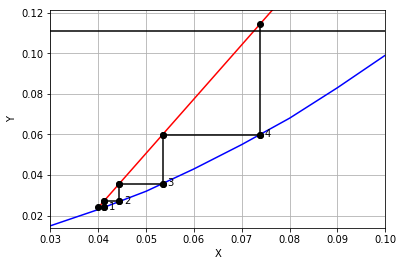



4 theoretical stages are requred



In [5]:
slope = 2*minSlope;


# operating line
Xop = np.linspace(X0,max(X))
Yop = (Xop-X0)*slope + Y1

plt.plot(X,Y,'b-')
plt.plot(Xop,Yop,'r-')
plt.plot(X, YNP1*np.ones_like(X),'k-')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.axis([X0-0.01,0.1,Y1-0.01,YNP1+0.01])


Xim1 = X0
Yi   = Y1
nstage = 0
more = 1

while more:

  # liquid leaving stage i
  Xi = np.interp(Yi,Y,X)
  
  # vapor entering stage i from i+1
  Yip1 = (Xi-X0)*slope + Y1
   
  nstage += 1

  plt.plot([Xi,Xi],[Yi,Yip1],'ko-')
  plt.plot([Xim1,Xi],[Yi,Yi],'ko-')
  plt.text(Xi+0.001,Yi-0.001,str(nstage))

  Xim1 = Xi
  Yi = Yip1
  
  if Yip1 > YNP1:
    more = 0
  
plt.show()

print('\n\n{:d} theoretical stages are requred\n'.format(nstage))

# Part 3 - actual number of trays

We know that 
$$
    E = \frac{N_t}{N_a} \quad \implies \quad N_a = \frac{N_t}{E}
$$

In [6]:
eff = 0.4  # 40% efficiency

print('Assuming that {:.0f}% efficiency can be applied to the column as a whole, {:.0f} trays are required.\n'.format(100*eff,(nstage/eff)) ) 

Assuming that 40% efficiency can be applied to the column as a whole, 10 trays are required.



---
## Alternative graphical approach
Alternatively, we can step 50% of the way to the equilibrium curve at each stage.  
This is shown below.

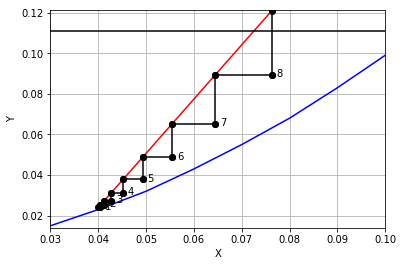


At 40.0% efficiency, 8 stages are requred from the graphical technique



In [19]:
plt.plot(X,Y,'b-',Xop,Yop,'r-')
plt.plot(X,YNP1*np.ones_like(X),'k-')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.axis([X0-0.01,0.1,Y1-0.01,YNP1+0.01])
Xim1 = X0
Yi   = Y1
nstage = 0
more = 1

while more:

  # liquid leaving stage i
  Xi = np.interp(Yi,Y,X)
  Xi = Xim1 + eff*(Xi-Xim1)
  
  # vapor entering stage i from i+1
  Yip1 = (Xi-X0)*slope + Y1

  nstage = nstage + 1
  
  plt.plot([Xi,Xi],[Yi,Yip1],'ko-')
  plt.plot([Xim1,Xi],[Yi,Yi],'ko-')
  plt.text(Xi+0.001,Yi-0.001,str(nstage))
  
  Xim1 = Xi
  Yi = Yip1
  
  if Yip1 > YNP1:
    more = 0

plt.show()

print('\nAt {:.1f}% efficiency, {:d} stages are requred from the graphical technique\n'.format(100*eff,nstage))

Generally, you would use the first technique rather than this one.